In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway


# for data visualization

import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving NCAA_MBB_2025.csv to NCAA_MBB_2025.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['NCAA_MBB_2025.csv']))
df2 = df

In [ ]:
df = pd.read_csv('NCAA_MBB_2025.csv')
df2= df

In [ ]:
df.head()

Team          Opponent  Result  Team Score  Op Score  \
0  Abilene Christian      Howard Payne       1         107        74   
1  Abilene Christian  Middle Tennessee       0          56        79   
2  Abilene Christian           McMurry       1         101        55   
3  Abilene Christian       Texas State       1          72        60   
4  Abilene Christian    Kennesaw State       0          78        84   

   Field Goals  3Point FG  3Point Attempted  3Point Percentage  2Point FG  \
0           42          3                13              0.231         39   
1           19          2                14              0.143         17   
2           41         13                30              0.433         28   
3           24          8                13              0.615         16   
4           27          5                15              0.333         22   

   ...  OP Free Throw Attempts  OP Free Throw Percentage  \
0  ...                      25                     0.760   
1  ...                      14                     0.786   
2  ...                      23                     0.783   
3  ...                      38                     0.711   
4  ...                      41                     0.805   

   OP Offensive Rebounds  OP Defensive Rebounds  OP Total Rebounds  \
0                      9                      8                 17   
1                      7                     23                 30   
2                      7                     23                 30   
3                      3                     18                 21   
4                      7                     23                 30   

   OP Assists  OP Steals  OP Blocks  OP Turnovers  OP Personal Fouls  
0           8         20          0            14                 24  
1          13         14          4            13                 21  
2           7          5          1            19                 12  
3           6          8          3            15                 20  
4          13          3          3            19                 20  

[5 rows x 41 columns]

In [ ]:
df.shape

(11881, 41)

In [ ]:
df.dtypes

Team                         object
Opponent                     object
Result                        int64
Team Score                    int64
Op Score                      int64
Field Goals                   int64
3Point FG                     int64
3Point Attempted              int64
3Point Percentage           float64
2Point FG                     int64
2Point Attempts               int64
2Point Percentage           float64
Free Throws                   int64
Free Throw Attempts           int64
Free Throw Percentage       float64
Offensive Rebounds            int64
Defensive Rebounds            int64
Total Rebounds                int64
Assists                       int64
Steals                        int64
Blocks                        int64
Turnovers                     int64
Personal Fouls                int64
OP Field Goals                int64
OP 3Point FG                  int64
OP 3Point Attempted           int64
OP 3Point Percentage        float64
OP 2Point FG                  int64
OP 2Point Attempts            int64
OP 2Point Percentage        float64
OP Free Throws                int64
OP Free Throw Attempts        int64
OP Free Throw Percentage    float64
OP Offensive Rebounds         int64
OP Defensive Rebounds         int64
OP Total Rebounds             int64
OP Assists                    int64
OP Steals                     int64
OP Blocks                     int64
OP Turnovers                  int64
OP Personal Fouls             int64
dtype: object

In [ ]:
# descriptive analysis
df.describe()

Result    Team Score      Op Score   Field Goals     3Point FG  \
count  11881.000000  11881.000000  11881.000000  11881.000000  11881.000000   
mean       0.521252     73.905479     72.153522     26.131975      7.793788   
std        0.499569     13.142232     12.476746      5.285065      3.257118   
min        0.000000     28.000000     19.000000     10.000000      0.000000   
25%        0.000000     65.000000     64.000000     23.000000      5.000000   
50%        1.000000     73.000000     72.000000     26.000000      8.000000   
75%        1.000000     82.000000     80.000000     29.000000     10.000000   
max        1.000000    143.000000    121.000000     54.000000     25.000000   

       3Point Attempted  3Point Percentage     2Point FG  2Point Attempts  \
count      11881.000000       11881.000000  11881.000000     11881.000000   
mean          22.895548           0.338654     18.338187        35.580591   
std            6.323633           0.105589      4.891028         7.311233   
min            5.000000           0.000000      4.000000        10.000000   
25%           19.000000           0.269000     15.000000        31.000000   
50%           22.000000           0.333000     18.000000        35.000000   
75%           27.000000           0.409000     21.000000        40.000000   
max           58.000000           0.778000     44.000000        66.000000   

       2Point Percentage  ...  OP Free Throw Attempts  \
count       11881.000000  ...            11881.000000   
mean            0.517578  ...               18.932076   
std             0.099706  ...                7.539515   
min             0.179000  ...                0.000000   
25%             0.448000  ...               13.000000   
50%             0.515000  ...               18.000000   
75%             0.583000  ...               24.000000   
max             0.909000  ...               65.000000   

       OP Free Throw Percentage  OP Offensive Rebounds  OP Defensive Rebounds  \
count              11878.000000           11881.000000           11881.000000   
mean                   0.716022               8.651039              22.551048   
std                    0.126181               3.630691               4.934566   
min                    0.000000               0.000000               6.000000   
25%                    0.636000               6.000000              19.000000   
50%                    0.724000               8.000000              22.000000   
75%                    0.800000              11.000000              26.000000   
max                    1.000000              29.000000              44.000000   

       OP Total Rebounds    OP Assists     OP Steals     OP Blocks  \
count       11881.000000  11881.000000  11881.000000  11881.000000   
mean           31.202087     13.189967      6.664591      3.285666   
std             6.360943      4.475863      2.942610      2.141117   
min            10.000000      1.000000      0.000000      0.000000   
25%            27.000000     10.000000      5.000000      2.000000   
50%            31.000000     13.000000      6.000000      3.000000   
75%            35.000000     16.000000      8.000000      5.000000   
max            62.000000     33.000000     21.000000     15.000000   

       OP Turnovers  OP Personal Fouls  
count  11881.000000       11881.000000  
mean      11.396600          16.924333  
std        3.966667           4.210586  
min        1.000000           4.000000  
25%        9.000000          14.000000  
50%       11.000000          17.000000  
75%       14.000000          20.000000  
max       34.000000          40.000000  

[8 rows x 39 columns]

In [ ]:
df.isna().sum()

Team                        0
Opponent                    0
Result                      0
Team Score                  0
Op Score                    0
Field Goals                 0
3Point FG                   0
3Point Attempted            0
3Point Percentage           0
2Point FG                   0
2Point Attempts             0
2Point Percentage           0
Free Throws                 0
Free Throw Attempts         0
Free Throw Percentage       2
Offensive Rebounds          0
Defensive Rebounds          0
Total Rebounds              0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
Personal Fouls              0
OP Field Goals              0
OP 3Point FG                0
OP 3Point Attempted         0
OP 3Point Percentage        0
OP 2Point FG                0
OP 2Point Attempts          0
OP 2Point Percentage        0
OP Free Throws              0
OP Free Throw Attempts      0
OP Free Throw Percentage    3
OP Offensive Rebounds       0
OP Defensive Rebounds       0
OP Total Rebounds           0
OP Assists                  0
OP Steals                   0
OP Blocks                   0
OP Turnovers                0
OP Personal Fouls           0
dtype: int64

In [ ]:
df = df.dropna()

<Axes: >

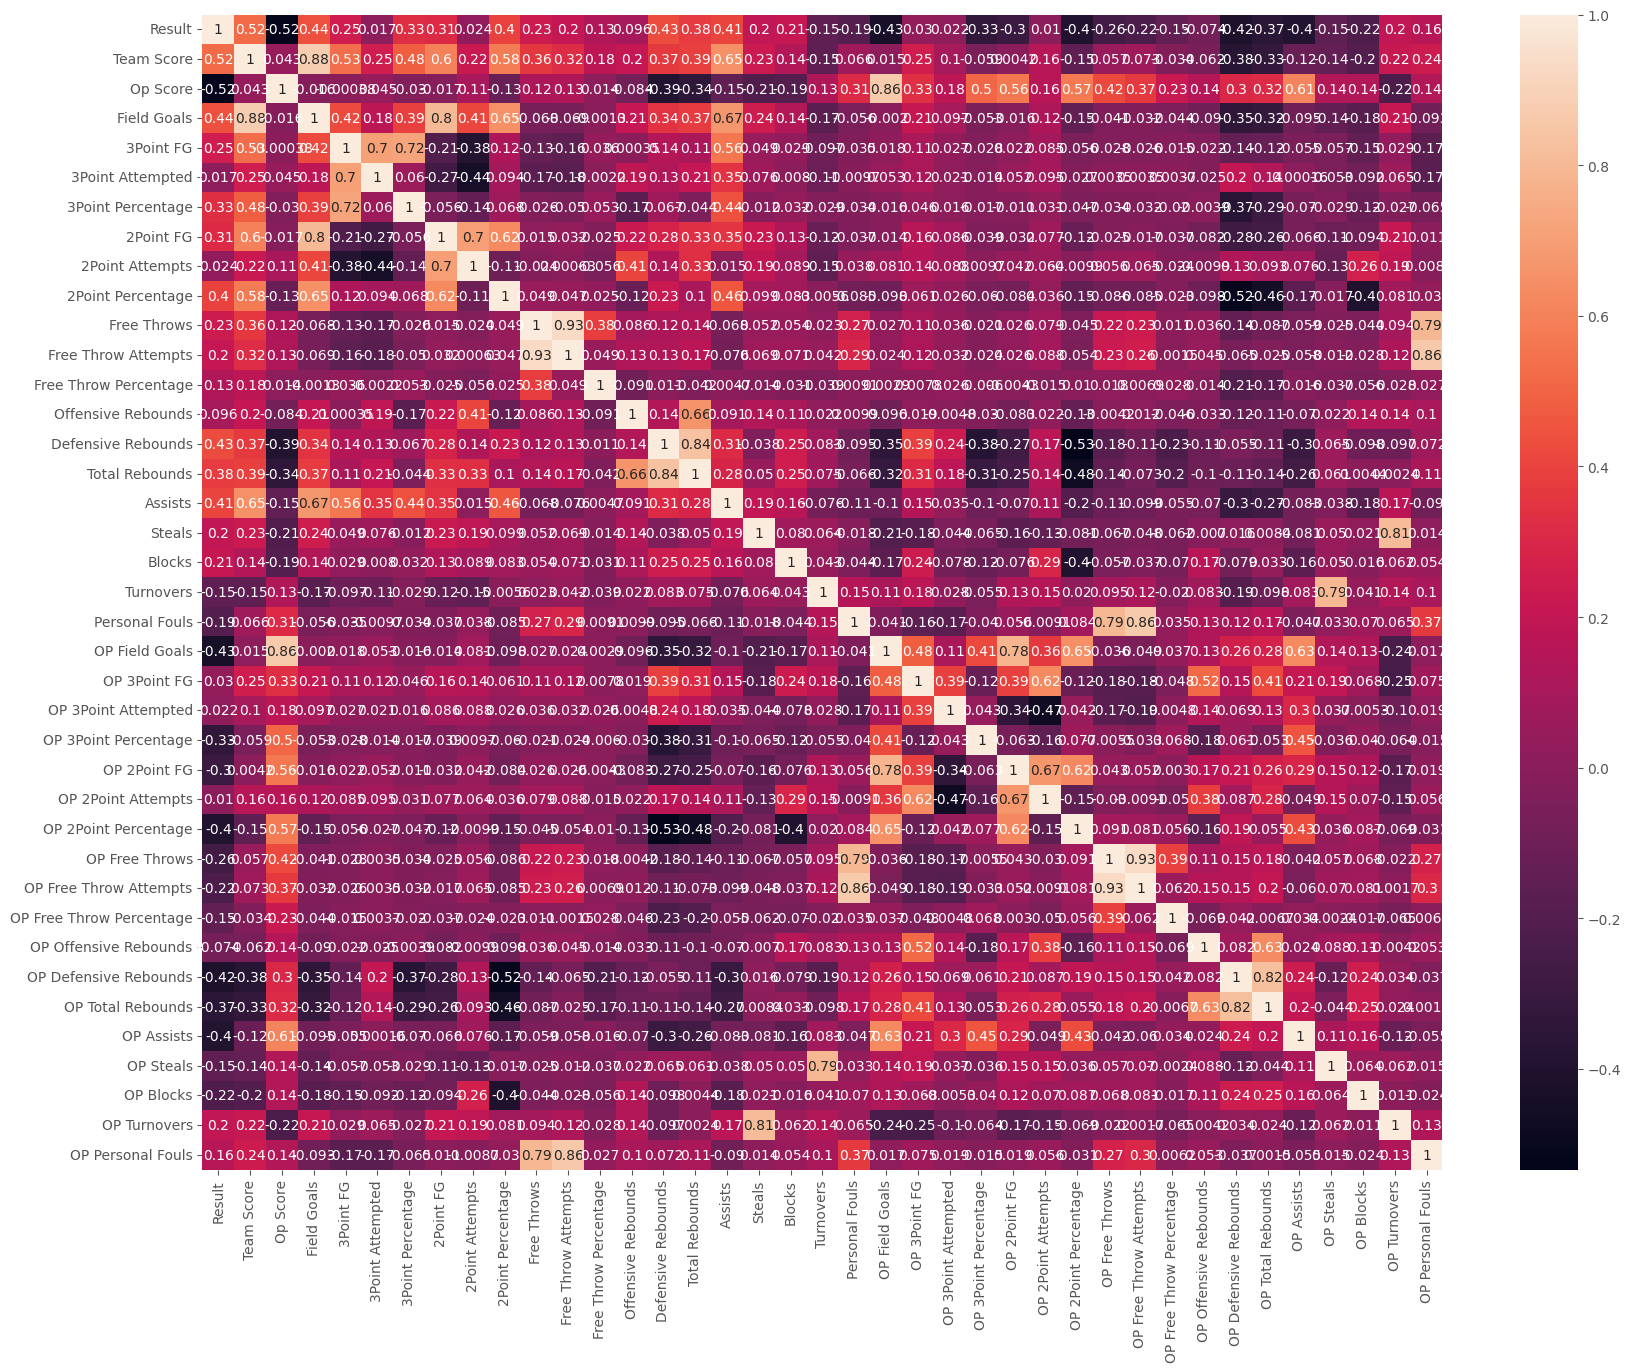

In [ ]:
# Correlation heatmap
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

# Scatter Plots and Regression
- Could do categorical based on team here?

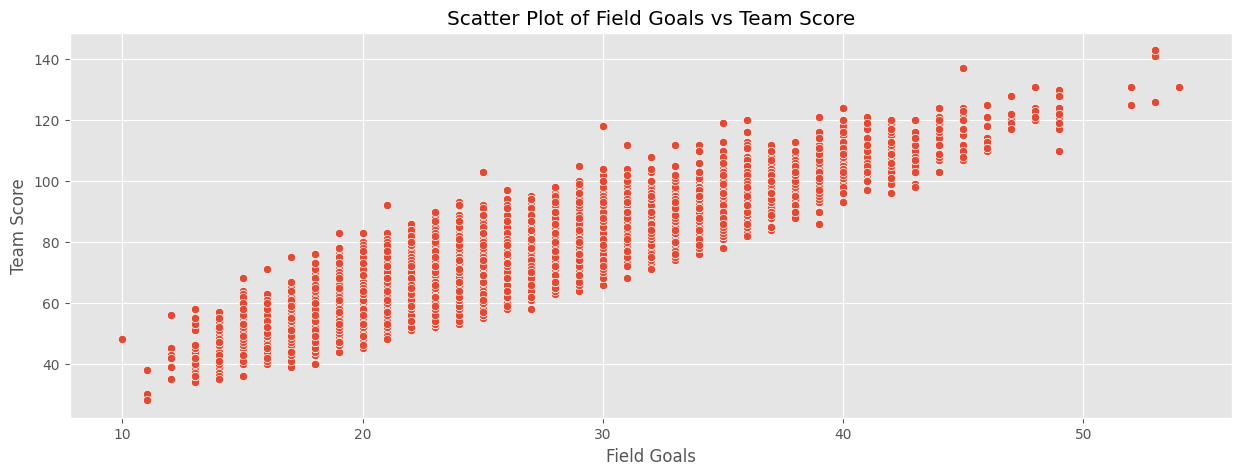

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Field Goals', y='Team Score')
plt.title('Scatter Plot of Field Goals vs Team Score')
plt.show()

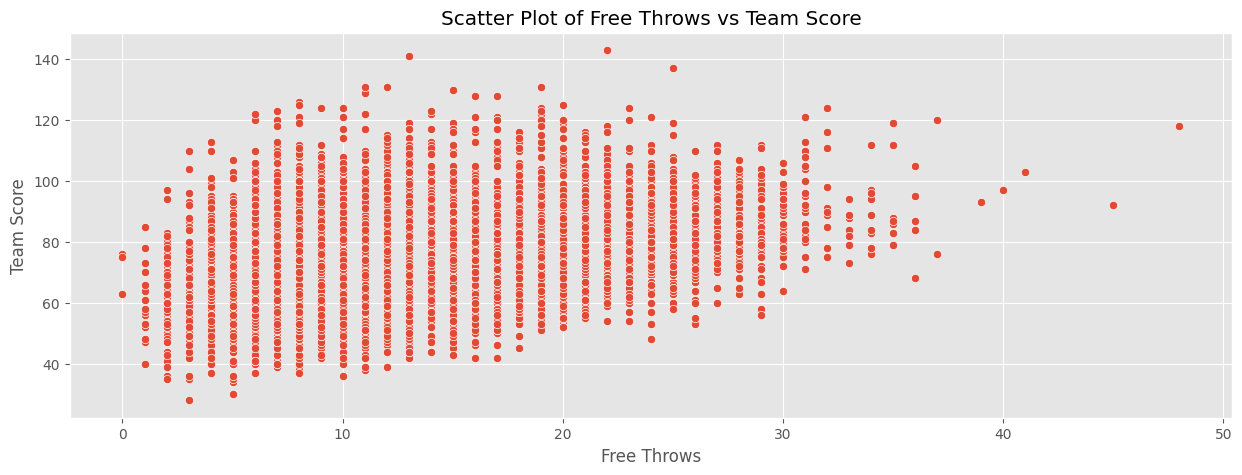

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Free Throws', y='Team Score')
plt.title('Scatter Plot of Free Throws vs Team Score')
plt.show()

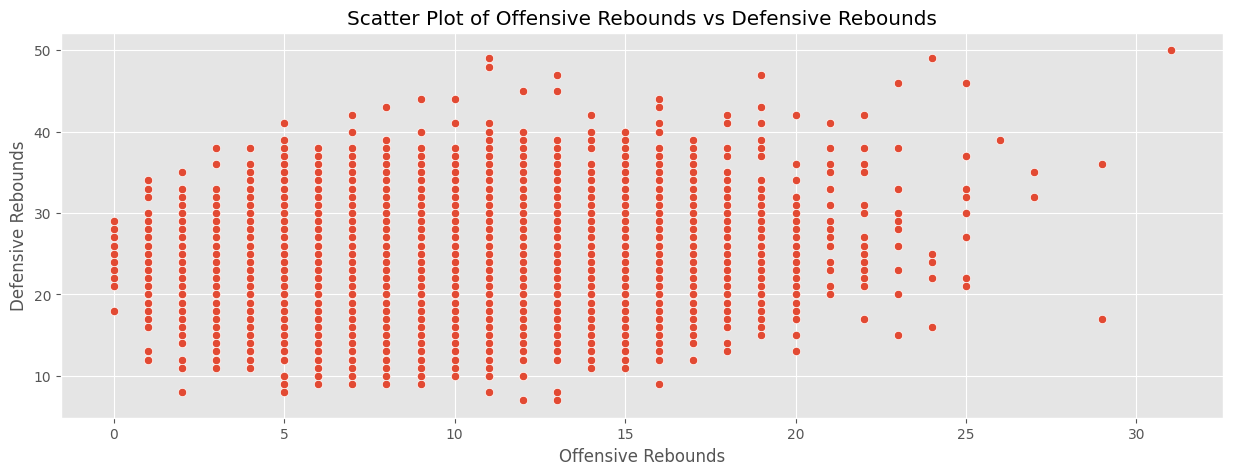

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Offensive Rebounds', y='Defensive Rebounds')
plt.title('Scatter Plot of Offensive Rebounds vs Defensive Rebounds')
plt.show()

In [ ]:
import plotly.express as px

# Step 1: Get the top 10 teams by total offensive rebounds
top_10_teams = (
    df2.groupby('Team')['Offensive Rebounds']
    .sum()
    .nlargest(10)
    .index
)

# Step 2: Filter the DataFrame
df_top10 = df[df['Team'].isin(top_10_teams)]

# Step 3: Create the box plot in Plotly
fig = px.box(
    df_top10,
    x='Team',
    y='Offensive Rebounds',
    color='Team',   # 🎨 each team gets a different color
    title='Offensive Rebounds by Top 10 Teams',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Offensive Rebounds',
    xaxis_tickangle=-45,    # Rotate x-axis labels
    showlegend=False        # No need for a legend since color = x-axis
)

fig.show()



In [ ]:
import plotly.express as px

# Step 1: Get the top 10 teams by total defensive rebounds
top_10_teams = (
    df.groupby('Team')['Defensive Rebounds']
    .sum()
    .nlargest(10)
    .index
)

# Step 2: Filter the DataFrame
df_top10 = df[df['Team'].isin(top_10_teams)]

# Step 3: Create the box plot in Plotly
fig = px.box(
    df_top10,
    x='Team',
    y='Defensive Rebounds',
    color='Team',   # 🎨 each team has a different color
    title='Defensive Rebounds by Top 10 Teams',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Defensive Rebounds',
    xaxis_tickangle=-45,    # Rotate x-axis labels for better readability
    showlegend=False        # No need for a legend
)

fig.show()



In [ ]:

# Step 1: Get the top 10 teams by total defensive rebounds
top_10_teams = (
    df.groupby('Team')['Team Score']
    .sum()
    .nlargest(10)
    .index
)

# Step 2: Filter the DataFrame
df_top10 = df[df['Team'].isin(top_10_teams)]

# Step 3: Create the box plot in Plotly
fig = px.box(
    df_top10,
    x='Team',
    y='Team Score',
    color='Team',   # 🎨 each team has a different color
    title='Team Score by Top 10 Teams',
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Team Score',
    xaxis_tickangle=-45,    # Rotate x-axis labels for better readability
    showlegend=False        # No need for a legend
)

fig.show()



In [ ]:
# only keep the variables that you can perform pca with
df = df.select_dtypes(include=['number'])

In [ ]:
import pandas as pd
import statsmodels.api as sm
#df = df.apply(pd.to_numeric, errors='coerce')
# Prevent scientific notation in numpy
#np.set_printoptions(suppress=True)
# Define features (X) and target (y)
X = df.drop('Result', axis=1)  # Remove non-numeric columns and target variable
y = df['Result']

# Add a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the model (you need to call fit() to create the results object)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     572.4
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        20:06:37   Log-Likelihood:                -2836.5
No. Observations:               11876   AIC:                             5743.
Df Residuals:                   11841   BIC:                             6001.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Only significant variables and not looking at opponent stats

In [ ]:
import pandas as pd
import statsmodels.api as sm
#df = df.apply(pd.to_numeric, errors='coerce')
# Prevent scientific notation in numpy
#np.set_printoptions(suppress=True)
# Define features (X) and target (y)
X = df[['3Point Percentage', '2Point Percentage', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Blocks', 'Turnovers', 'Personal Fouls']]  # Remove non-numeric columns and target variable
y = df['Result']

# Add a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the model (you need to call fit() to create the results object)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1128.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        20:06:37   Log-Likelihood:                -4938.0
No. Observations:               11876   AIC:                             9896.
Df Residuals:                   11866   BIC:                             9970.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2369    

<Axes: >

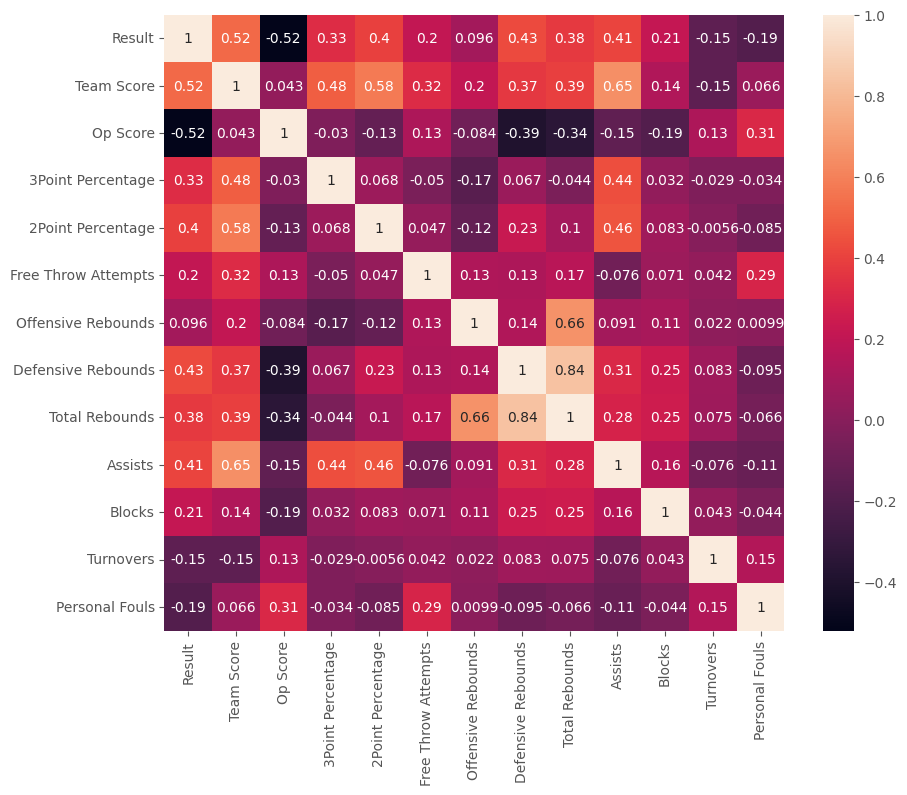

In [ ]:
# Correlation heatmap
import seaborn as sns
df_sig_variables_not_opponents = df[['Result','Team Score','Op Score','3Point Percentage', '2Point Percentage', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Blocks', 'Turnovers', 'Personal Fouls']]  # Remove non-numeric columns and target variable
corr = df_sig_variables_not_opponents.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

<Axes: >

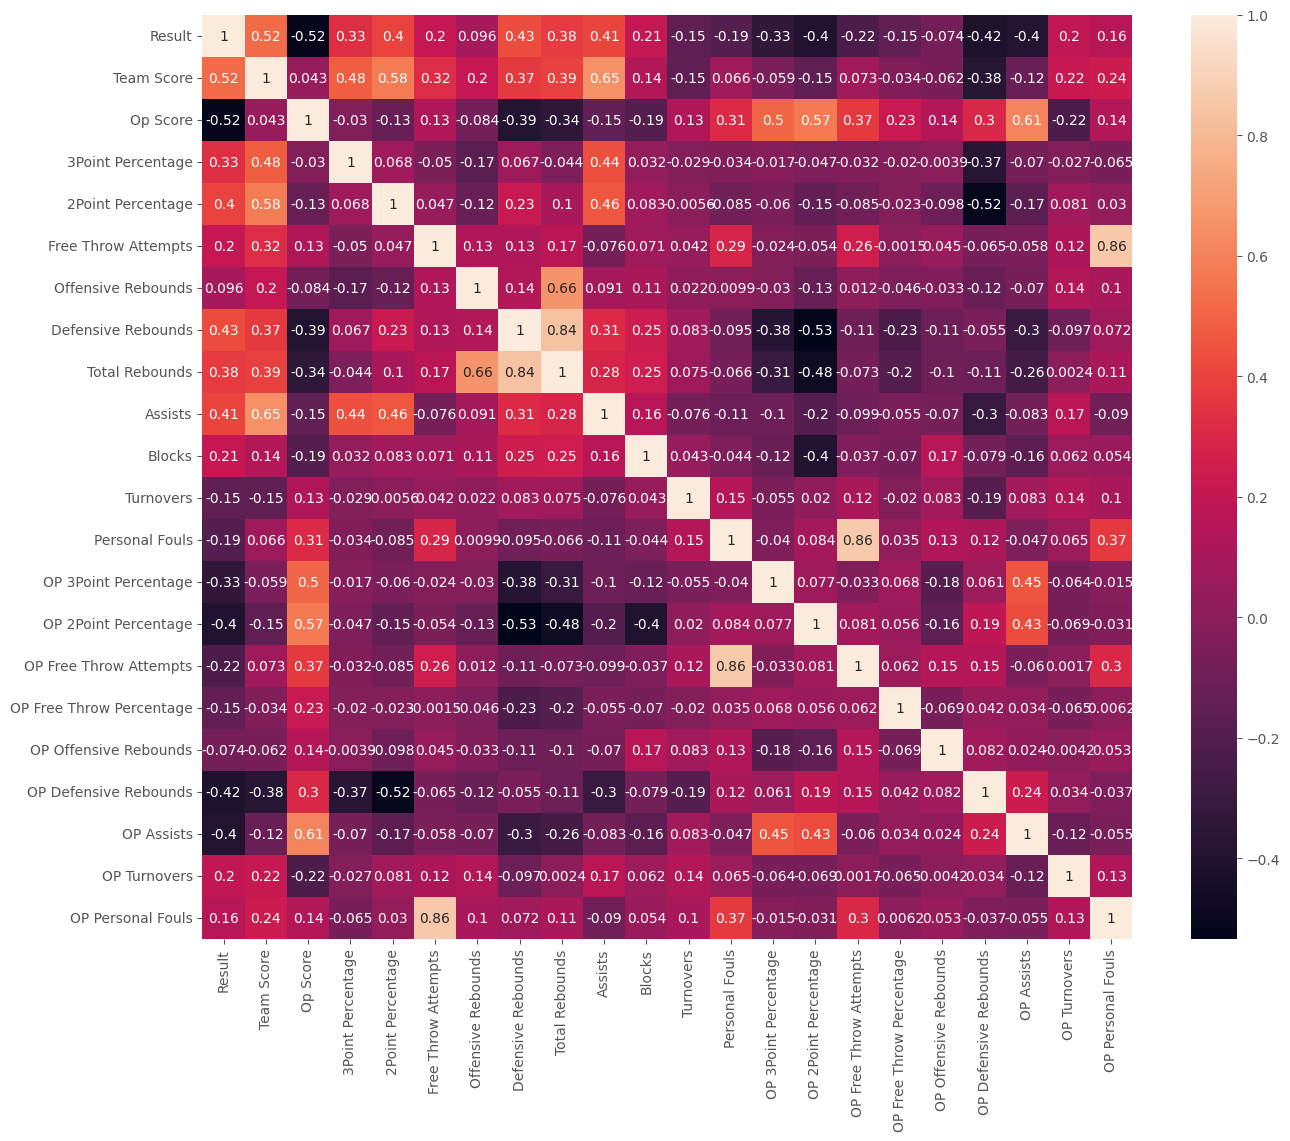

In [ ]:
# Correlation heatmap
import seaborn as sns
df_sigvariables = df[['Result','Team Score','Op Score','3Point Percentage', '2Point Percentage', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Blocks', 'Turnovers', 'Personal Fouls', 'OP 3Point Percentage', 'OP 2Point Percentage', 'OP Free Throw Attempts', 'OP Free Throw Percentage', 'OP Offensive Rebounds', 'OP Defensive Rebounds', 'OP Assists', 'OP Turnovers', 'OP Personal Fouls']]
corr = df_sigvariables.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

#**PCA**

All variables

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_all = df.drop(['Team Score','Op Score', 'Result'], axis=1)  # Remove non-numeric columns and target variable
df_scaled = scaler.fit_transform(df_all)

# PCA
pca = PCA(n_components=7)
pca.fit(df_scaled)

# Transform the data
df_pca = pca.transform(df_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.14187736 0.10581959 0.09764052 0.0792347  0.07369576 0.06719845
 0.0560781 ]


In [ ]:
# Extracting the PCA loadings
pca_loadings = pca.components_.T
pca_loadings_df = pd.DataFrame(pca_loadings, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7'], index=df_all.columns)
pca_loadings_df

PC1       PC2       PC3       PC4       PC5  \
Field Goals               0.319733 -0.014313  0.154574  0.164082  0.236295   
3Point FG                 0.148582 -0.162401  0.085044  0.368667 -0.228029   
3Point Attempted          0.063839 -0.126208  0.105665  0.195257 -0.277361   
3Point Percentage         0.139252 -0.107591  0.019884  0.336056 -0.066953   
2Point FG                 0.246590  0.092624  0.110419 -0.068079  0.407094   
2Point Attempts           0.067108  0.130395  0.129035 -0.279633  0.351340   
2Point Percentage         0.263243 -0.009258  0.014303  0.206949  0.188073   
Free Throws               0.004100  0.372044  0.000684  0.117430  0.070898   
Free Throw Attempts      -0.001902  0.391691  0.016734  0.081476  0.066242   
Free Throw Percentage     0.019991  0.041772 -0.041989  0.114531  0.032343   
Offensive Rebounds        0.128586  0.132714  0.077399 -0.164919  0.056173   
Defensive Rebounds        0.280649  0.103713  0.174270 -0.131755 -0.182207   
Total Rebounds            0.284106  0.152085  0.175065 -0.191173 -0.107252   
Assists                   0.284785 -0.071540  0.115801  0.228930  0.016053   
Steals                    0.117631  0.065137 -0.066238 -0.068753  0.103179   
Blocks                    0.131050  0.091426  0.141395 -0.073444 -0.129944   
Turnovers                -0.039355  0.096200  0.084634  0.064744 -0.046244   
Personal Fouls           -0.115296  0.334550 -0.077002  0.193642 -0.055974   
OP Field Goals           -0.236987 -0.099958  0.306922  0.166931  0.268129   
OP 3Point FG              0.012905  0.023855  0.490585 -0.016591 -0.041369   
OP 3Point Attempted       0.038296 -0.052000  0.086117 -0.133055  0.056245   
OP 3Point Percentage     -0.116355 -0.102511 -0.062960  0.057746  0.225486   
OP 2Point FG             -0.205416 -0.028509  0.315006  0.204845  0.142531   
OP 2Point Attempts       -0.020235  0.067152  0.397086  0.097389 -0.087562   
OP 2Point Percentage     -0.249689 -0.105474  0.005980  0.170104  0.278801   
OP Free Throws           -0.134862  0.307504 -0.098425  0.215895 -0.043404   
OP Free Throw Attempts   -0.120811  0.330860 -0.075999  0.199760 -0.064388   
OP Free Throw Percentage -0.072937  0.017587 -0.076921  0.098197  0.038954   
OP Offensive Rebounds    -0.096290  0.093023  0.251871 -0.025411 -0.166407   
OP Defensive Rebounds    -0.246505  0.004657  0.122348 -0.199516 -0.120894   
OP Total Rebounds        -0.246186  0.056710  0.238678 -0.169277 -0.188767   
OP Assists               -0.197603 -0.120866  0.140964  0.035621  0.246268   
OP Steals                -0.042271  0.048962  0.111838  0.053698 -0.049071   
OP Blocks                -0.133249  0.044399  0.082701 -0.177980  0.016889   
OP Turnovers              0.099932  0.104919 -0.095684 -0.050591  0.098919   
OP Personal Fouls        -0.024988  0.387087 -0.002718  0.091448  0.053876   

                               PC6       PC7  
Field Goals              -0.223348 -0.055777  
3Point FG                -0.149191 -0.144823  
3Point Attempted         -0.210713 -0.162654  
3Point Percentage        -0.009712 -0.056024  
2Point FG                -0.142038  0.036121  
2Point Attempts          -0.232797 -0.010127  
2Point Percentage         0.054824  0.057175  
Free Throws               0.276483 -0.210438  
Free Throw Attempts       0.233834 -0.191007  
Free Throw Percentage     0.165924 -0.098774  
Offensive Rebounds       -0.119954 -0.007308  
Defensive Rebounds        0.100320 -0.087749  
Total Rebounds            0.009839 -0.070646  
Assists                  -0.145385 -0.038159  
Steals                   -0.249817  0.181569  
Blocks                    0.004176  0.104417  
Turnovers                 0.186710  0.493662  
Personal Fouls           -0.227823  0.017889  
OP Field Goals            0.049474 -0.058116  
OP 3Point FG              0.123549 -0.083009  
OP 3Point Attempted       0.118364 -0.314570  
OP 3Point Percentage      0.019792 -0.138842  
OP 2Point FG             -0.010194  0.145099  
OP 2Point Attemp

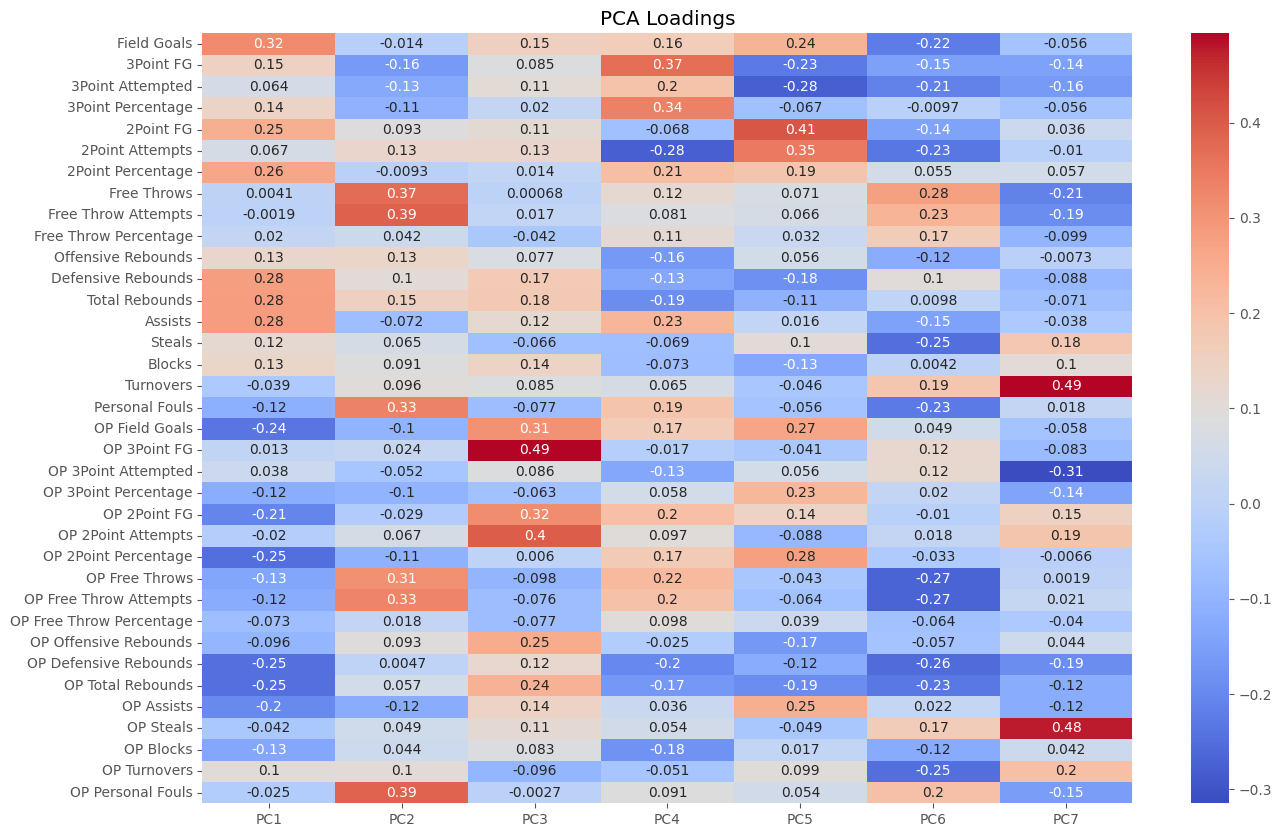

In [ ]:
# Visualizing the loadings
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pca_loadings_df, cmap="coolwarm", annot=True)
plt.title('PCA Loadings')
plt.show()

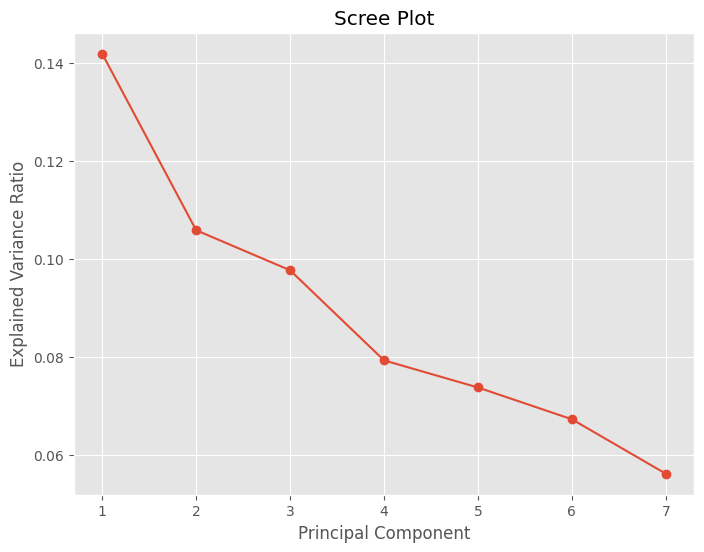

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


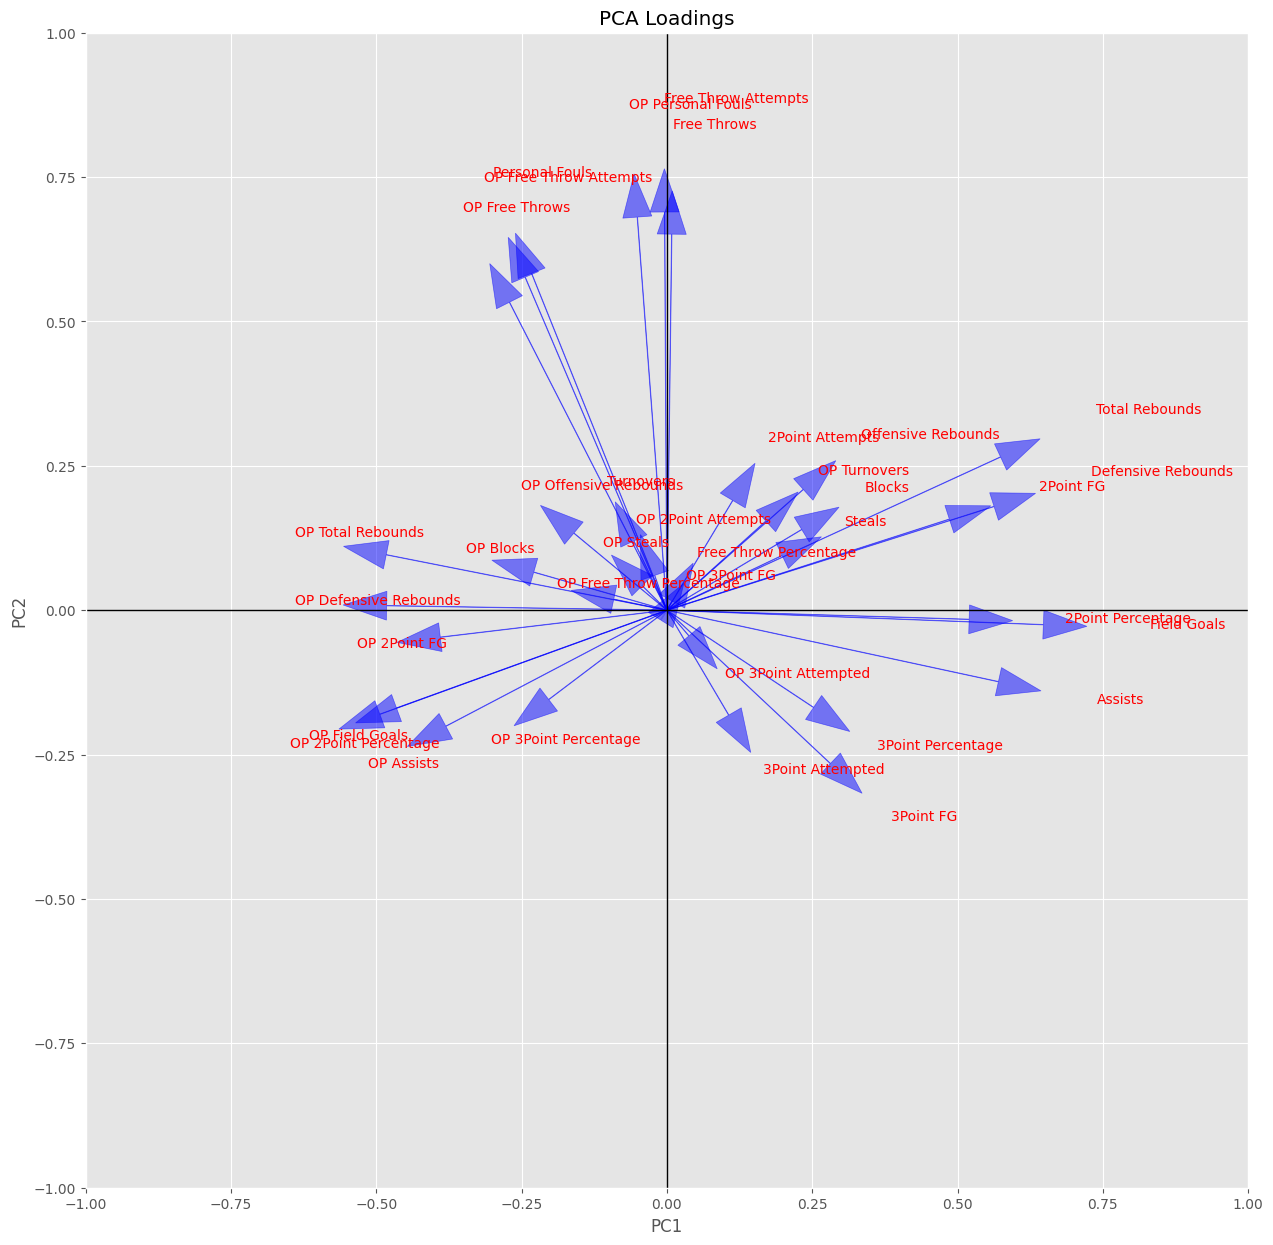

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_all)

# Step 2: Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Assuming `pca` is your fitted PCA model from sklearn
# Let's correct the code for plotting the PCA loadings
plt.figure(figsize=(15, 15))

# Using pca.components_ to get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Ensure you have a list of feature names equal in length to the number of features in df_scaled
feature_names = df_all.columns  # Adjust this if your feature names are stored differently

# Plotting the loadings for PCA
for i, (pc1, pc2) in enumerate(loadings):
    plt.arrow(0, 0, pc1, pc2, head_width=0.05, length_includes_head=True, color='blue', alpha=0.5)
    plt.text(pc1 * 1.15, pc2 * 1.15, feature_names[i], color='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loadings')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


Just Significant Variables Related to The Team

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_sig_variables_not_opponents = df[['3Point Percentage', '2Point Percentage', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds', 'Assists', 'Blocks', 'Turnovers', 'Personal Fouls']]  # Remove non-numeric columns and target variable
df_scaled3 = scaler.fit_transform(df_sig_variables_not_opponents)

# PCA
pca = PCA(n_components=7)
pca.fit(df_scaled3)

# Transform the data
df_pca3 = pca.transform(df_scaled3)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.21574566 0.16388408 0.13125752 0.10949402 0.1040386  0.09389946
 0.07977728]


In [ ]:
# Extracting the PCA loadings
pca_loadings3 = pca.components_.T
pca_loadings_df3 = pd.DataFrame(pca_loadings3, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7'], index=df_sig_variables_not_opponents.columns)
pca_loadings_df3

PC1       PC2       PC3       PC4       PC5  \
3Point Percentage    0.359834 -0.250788  0.405059 -0.079134 -0.605705   
2Point Percentage    0.458804 -0.012461  0.178776  0.010419  0.650370   
Free Throw Attempts -0.025589  0.552104  0.296051 -0.396091  0.152716   
Offensive Rebounds   0.021588  0.433737 -0.474553 -0.239970 -0.308445   
Defensive Rebounds   0.419491  0.333933 -0.171218  0.138511  0.097860   
Assists              0.605723 -0.061607  0.091941 -0.128899 -0.131878   
Blocks               0.275409  0.309903 -0.256742  0.175140 -0.207822   
Turnovers           -0.044939  0.298785  0.235911  0.832060 -0.094261   
Personal Fouls      -0.195333  0.378660  0.576003 -0.142679 -0.112410   

                          PC6       PC7  
3Point Percentage    0.025011  0.217951  
2Point Percentage   -0.114228 -0.308250  
Free Throw Attempts  0.143436  0.364413  
Offensive Rebounds  -0.526432 -0.231249  
Defensive Rebounds  -0.015078  0.577664  
Assists             -0.253761 -0.233650  
Blocks               0.740687 -0.360968  
Turnovers           -0.274337  0.008014  
Personal Fouls      -0.011041 -0.390585

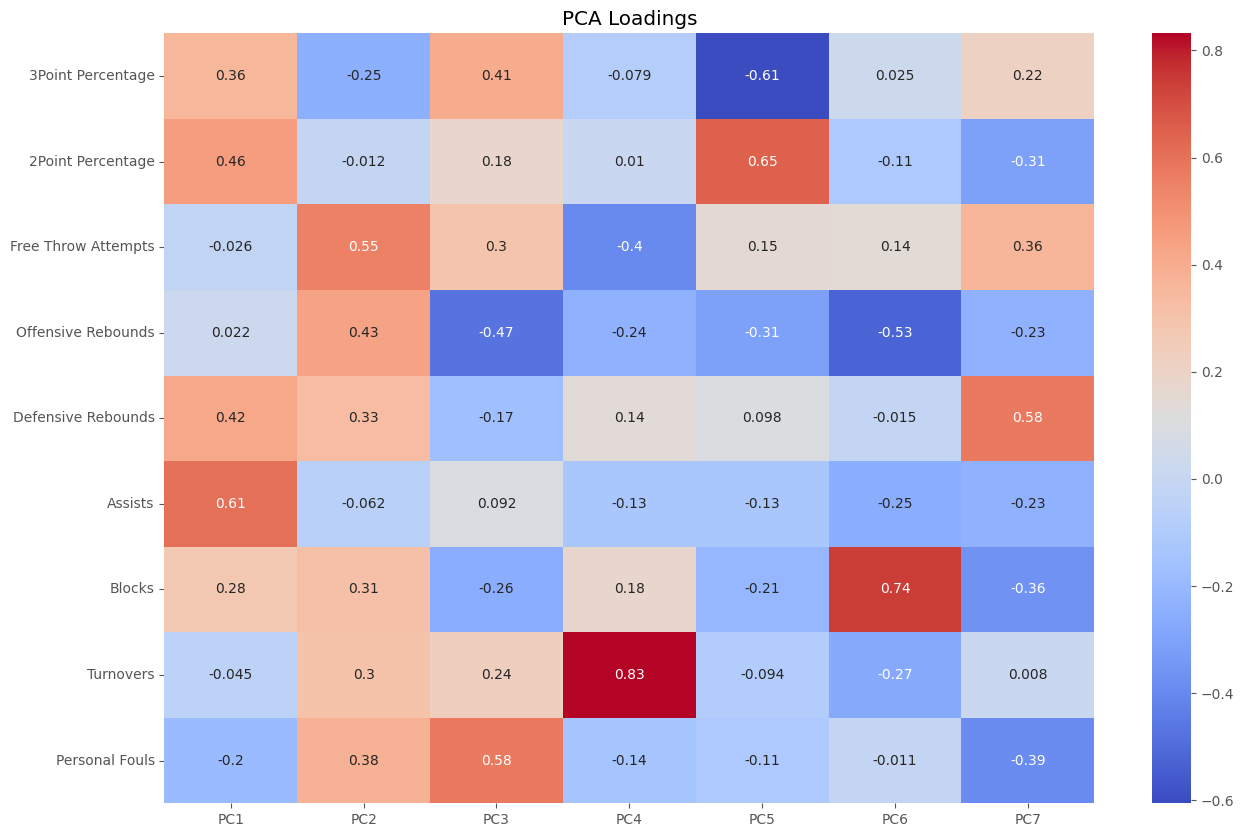

In [ ]:
# Visualizing the loadings
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pca_loadings_df3, cmap="coolwarm", annot=True)
plt.title('PCA Loadings')
plt.show()

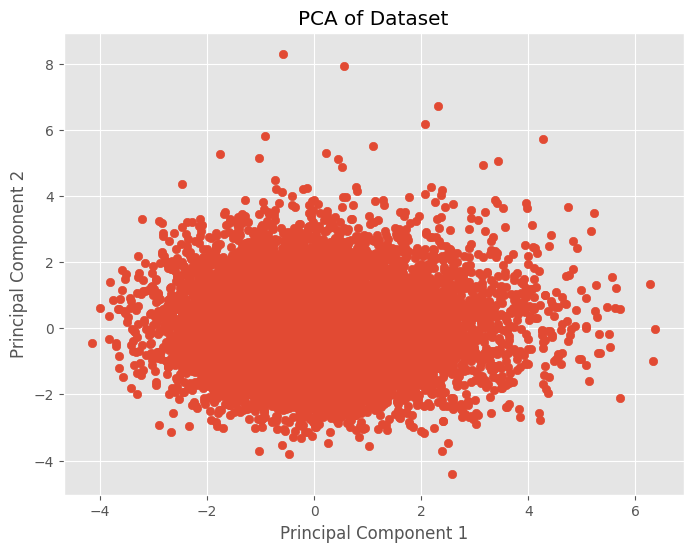

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca3[:, 0], df_pca3[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()


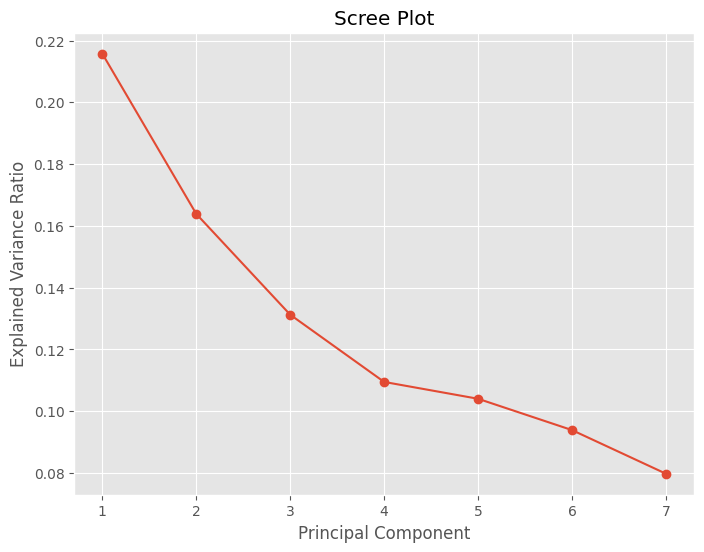

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with features you want to perform PCA on
# Example: df = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3'])

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import plotly.graph_objects as go

# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sig_variables_not_opponents)

# Step 2: Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 3: SAMPLE fewer points to avoid overcrowding
import pandas as pd

# Create a DataFrame for easier sampling
components_df = pd.DataFrame(components, columns=['PC1', 'PC2'])

# Sample (for example 1000 points, or however many you want)
components_sampled = components_df.sample(n=1000, random_state=42)

# Step 4: Create a cleaner biplot
fig = go.Figure()

# Scatter plot for the (sampled) components
fig.add_trace(go.Scatter(
    x=components_sampled['PC1'],
    y=components_sampled['PC2'],
    mode='markers',
    marker=dict(size=5, opacity=0.4, color='blue'),  # Smaller, more transparent
    name='Observations'
))

# Add arrows for feature loadings
for i, feature in enumerate(df_sig_variables_not_opponents.columns):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0]],
        y=[0, loadings[i, 1]],
        mode='lines+text',
        text=[None, feature],  # Only label the arrowhead
        textposition='top center',
        line=dict(width=2),
        showlegend=False
    ))

# Step 5: Adjust the layout
fig.update_layout(
    title='PCA Biplot (Sampled Observations)',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    width=900,
    height=700
)

fig.show()


In [ ]:
# prompt: generate a pca loadings diagram

# Assuming 'df' is your DataFrame with features you want to perform PCA on
# Example: df = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sig_variables_not_opponents)

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a biplot
fig = go.Figure()

# Add scatter plot for the components
fig.add_trace(go.Scatter(x=components[:, 0], y=components[:, 1],
                         mode='markers', name='Observations'))

# Add arrows for loadings
for i, feature in enumerate(df_sig_variables_not_opponents.columns):
    fig.add_trace(go.Scatter(x=[0, loadings[i, 0]], y=[0, loadings[i, 1]],
                             mode='lines+text',
                             text=[feature],
                             textposition='top center',
                             showlegend=False))

# Adjust the layout
fig.update_layout(title='PCA Loadings Diagram',
                  xaxis_title='Principal Component 1',
                  yaxis_title='Principal Component 2',
                  width=800, height=600)

fig.show()


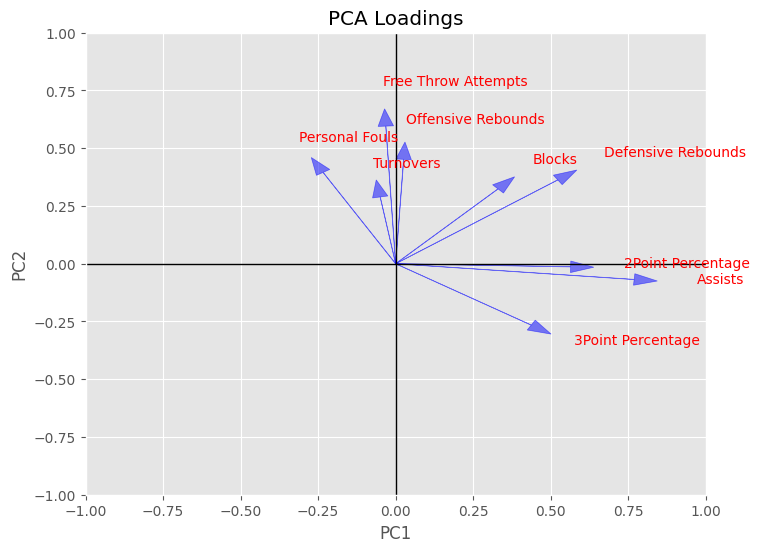

In [ ]:
import matplotlib.pyplot as plt

# Assuming `pca` is your fitted PCA model from sklearn
# Let's correct the code for plotting the PCA loadings
plt.figure(figsize=(8, 6))

# Using pca.components_ to get the loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Ensure you have a list of feature names equal in length to the number of features in df_scaled
feature_names = df_sig_variables_not_opponents.columns  # Adjust this if your feature names are stored differently

# Plotting the loadings for PCA
for i, (pc1, pc2) in enumerate(loadings):
    plt.arrow(0, 0, pc1, pc2, head_width=0.05, length_includes_head=True, color='blue', alpha=0.5)
    plt.text(pc1 * 1.15, pc2 * 1.15, feature_names[i], color='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loadings')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


In [ ]:
df_sigvariables = df[['3Point Percentage', '2Point Percentage', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds', 'Assists', 'Blocks', 'Turnovers', 'Personal Fouls', 'OP 3Point Percentage', 'OP 2Point Percentage', 'OP Free Throw Attempts', 'OP Free Throw Percentage', 'OP Offensive Rebounds', 'OP Defensive Rebounds', 'OP Assists', 'OP Turnovers', 'OP Personal Fouls']]
df_scaled2 = scaler.fit_transform(df_sigvariables)

pca2 = PCA(n_components=7)
pca2.fit(df_scaled2)

# Transform the data
df_pca2 = pca2.transform(df_scaled2)

print("Explained variance ratio including Opponent Variables:", pca2.explained_variance_ratio_)

Explained variance ratio including Opponent Variables: [0.16005757 0.1451957  0.09213226 0.07839726 0.06573315 0.0620007
 0.05876708]


In [ ]:
# Extracting the PCA loadings
pca_loadings2 = pca2.components_.T
pca_loadings_df2 = pd.DataFrame(pca_loadings2, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7'], index=df_sigvariables.columns)
pca_loadings_df2

PC1       PC2       PC3       PC4       PC5  \
3Point Percentage         0.203151 -0.069891 -0.383699 -0.294629  0.019808   
2Point Percentage         0.326444 -0.006399 -0.371760  0.020607 -0.070232   
Free Throw Attempts       0.005832  0.463975 -0.129813  0.387798 -0.154986   
Offensive Rebounds        0.090150  0.124445  0.163799  0.345678  0.222348   
Defensive Rebounds        0.390298  0.104100  0.241880  0.051123 -0.197749   
Assists                   0.368764 -0.059316 -0.300367 -0.089535  0.103895   
Blocks                    0.254842  0.107516  0.237536  0.004359  0.249721   
Turnovers                 0.005002  0.143591 -0.075034 -0.045722  0.535619   
Personal Fouls           -0.178675  0.453945 -0.122694 -0.345979 -0.010352   
OP 3Point Percentage     -0.229415 -0.136824 -0.264248  0.291634  0.137665   
OP 2Point Percentage     -0.376640 -0.106095 -0.274224 -0.007476 -0.002531   
OP Free Throw Attempts   -0.182901  0.429950 -0.104284 -0.387397 -0.040760   
OP Free Throw Percentage -0.119338 -0.017432 -0.137274 -0.037093 -0.225239   
OP Offensive Rebounds    -0.022040  0.141134  0.217008 -0.312613  0.373587   
OP Defensive Rebounds    -0.329961  0.005957  0.407159 -0.023702 -0.098362   
OP Assists               -0.318531 -0.157116 -0.185057  0.182169  0.291191   
OP Turnovers              0.071588  0.129724 -0.046460  0.154143  0.448856   
OP Personal Fouls        -0.025677  0.484881 -0.145028  0.344464 -0.122892   

                               PC6       PC7  
3Point Percentage        -0.255461 -0.080437  
2Point Percentage         0.077750  0.091253  
Free Throw Attempts      -0.188969  0.095155  
Offensive Rebounds        0.244914 -0.303933  
Defensive Rebounds       -0.019115  0.205216  
Assists                  -0.009530 -0.310718  
Blocks                   -0.369292 -0.204910  
Turnovers                 0.175791  0.512341  
Personal Fouls            0.084779 -0.126151  
OP 3Point Percentage     -0.348553 -0.254432  
OP 2Point Percentage      0.244346  0.187115  
OP Free Throw Attempts    0.061691 -0.159118  
OP Free Throw Percentage  0.025960 -0.343766  
OP Offensive Rebounds    -0.397652  0.048931  
OP Defensive Rebounds    -0.025478 -0.206075  
OP Assists               -0.309849  0.070221  
OP Turnovers              0.436628 -0.346465  
OP Personal Fouls        -0.164253  0.107923

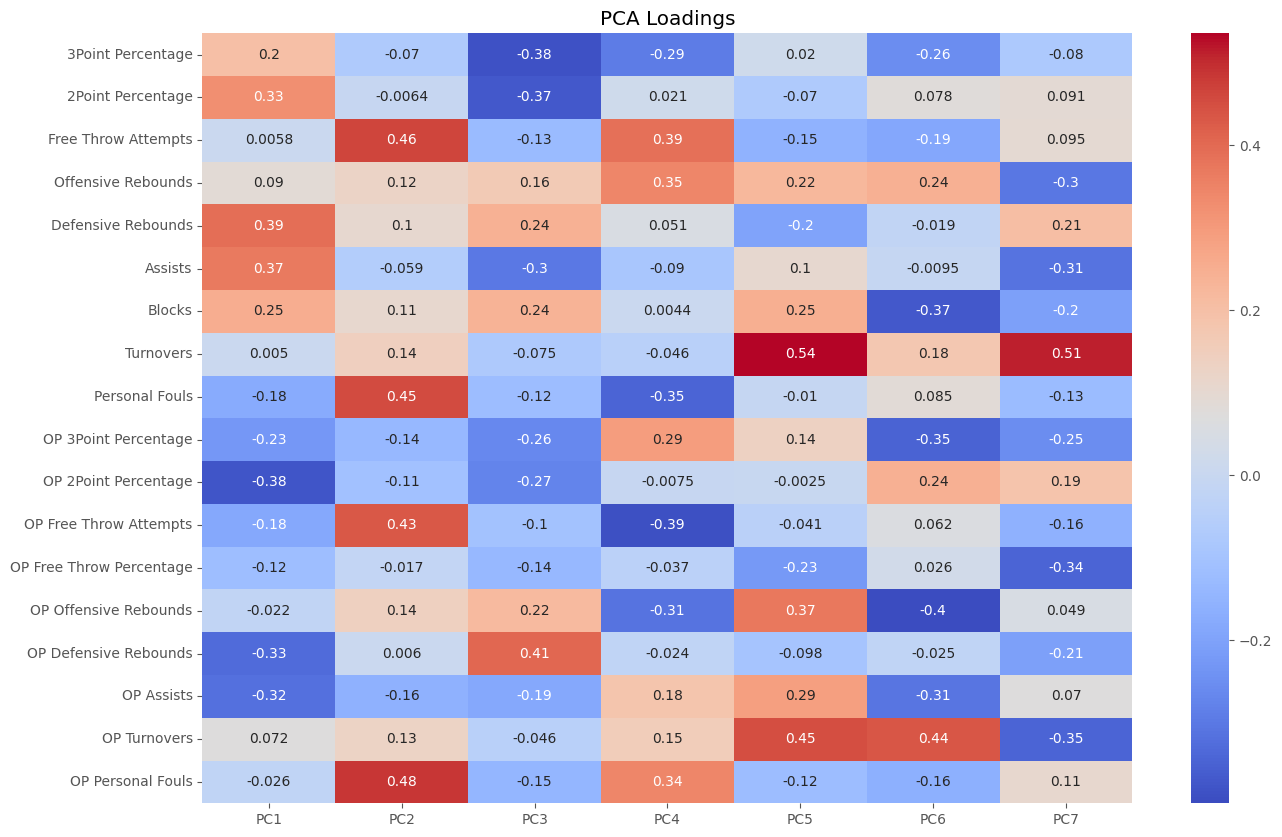

In [ ]:
# Visualizing the loadings
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pca_loadings_df2, cmap="coolwarm", annot=True)
plt.title('PCA Loadings')
plt.show()

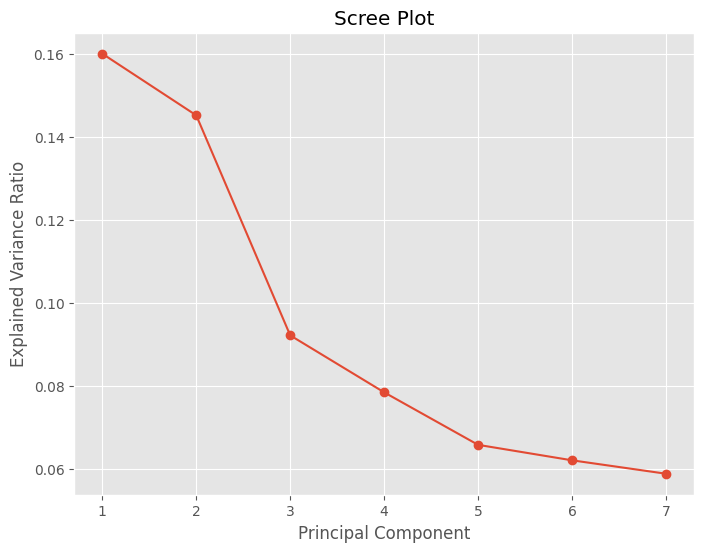

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), pca2.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df_sigvariables)

# Perform PCA
pca2 = PCA(n_components=2)
components = pca2.fit_transform(df_scaled2)
loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)

In [ ]:
!pip install adjustText

<Figure size 800x600 with 0 Axes>

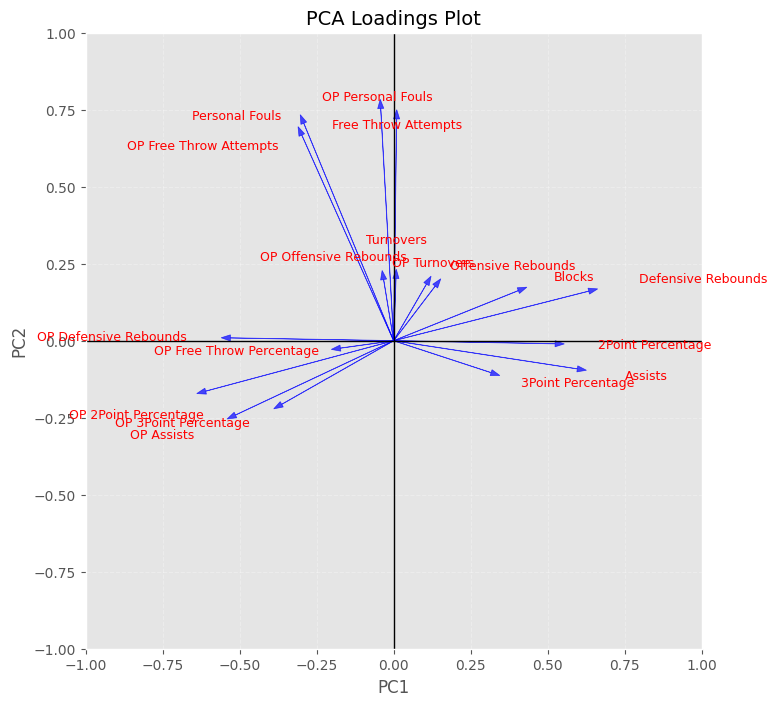

In [ ]:
import matplotlib.pyplot as plt

# Assuming `pca` is your fitted PCA model from sklearn
# Let's correct the code for plotting the PCA loadings
plt.figure(figsize=(8, 6))

# Using pca.components_ to get the loadings
loadings2 = pca2.components_.T * np.sqrt(pca2.explained_variance_)

# Ensure you have a list of feature names equal in length to the number of features in df_scaled
feature_names = df_sigvariables.columns  # Adjust this if your feature names are stored differently

# Plotting the loadings for PCA
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(8, 8))

# 1. Plot blue arrows
for i, (pc1, pc2) in enumerate(loadings):
    plt.arrow(0, 0, pc1, pc2, color='blue', alpha=0.7, head_width=0.02, length_includes_head=True)

# 2. Smart labeling
texts = []
for i, (pc1, pc2) in enumerate(loadings):
    norm = np.sqrt(pc1**2 + pc2**2)
    if norm > 0.15:
        x = pc1 * 1.2
        y = pc2 * 1.2

        # --- Smart label positioning ---
        if pc1 > 0.05:
            ha_setting = 'left'    # If arrow points right, text to right
        elif pc1 < -0.05:
            ha_setting = 'right'   # If arrow points left, text to left
        else:
            ha_setting = 'center'  # Close to vertical axis, center

        va_setting = 'center'

        # Special manual nudge: move Personal Fouls and OP Personal Fouls up
        if feature_names[i] in ['Personal Fouls', 'OP Personal Fouls', 'Turnovers']:
            y += 0.05  # Small upward bump

        if feature_names[i] in ['Personal Fouls', 'OP Personal Fouls', 'OP Free Throw Attempts', 'Free Throw Attempts']:
            y -= 0.2  # Small upward bump

        if feature_names[i] in ['OP 2Point Percentage']:
            y -= 0.035  # Small upward bump
            x += 0.15

        if feature_names[i] in ['OP Turnovers', 'OP Offensive Rebounds']:
            x -= 0.15

        texts.append(plt.text(x, y, feature_names[i],
                              color='red', ha=ha_setting, va=va_setting, fontsize=9))


# 4. Plot settings
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('PCA Loadings Plot', fontsize=14)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **Factor Analysis**

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sig_variables_not_opponents)  # Assuming 'df' is your DataFrame

# Performing Factor Analysis
fa = FactorAnalysis(n_components=3)  # Choosing 3 factors for demonstration
fa.fit(df_scaled)



FactorAnalysis(n_components=3)

In [ ]:
# The factor loadings are in fa.components_
factor_loadings = fa.components_.T
factor_loadings

array([[ 0.4385429 ,  0.02272867, -0.20858143],
       [ 0.4602035 , -0.02558371,  0.10883463],
       [-0.07893164,  0.29800874,  0.31840165],
       [ 0.08970028,  0.02716108,  0.29237673],
       [ 0.31060403, -0.05347672,  0.50807149],
       [ 0.99434502,  0.01507009, -0.00280657],
       [ 0.16701381, -0.02134199,  0.33522631],
       [-0.07792516,  0.14583036,  0.14891561],
       [-0.12622202,  0.94409883, -0.00839538]])

In [ ]:
n_optimal_factors = 3
fa_optimal = FactorAnalysis(n_components=n_optimal_factors)
fa_optimal.fit(df_scaled)

# Factor loadings
loadings = fa_optimal.components_.T
loading_df = pd.DataFrame(loadings, index=df_sig_variables_not_opponents.columns, columns=[f'Factor {i+1}' for i in range(n_optimal_factors)])

# Visualizing the loadings
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(loading_df, cmap="coolwarm", annot=True)
plt.title('Factor Loadings')
plt.show()


In [ ]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Standardizing the data
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df_sigvariables)  # Assuming 'df' is your DataFrame

# Performing Factor Analysis
fa2 = FactorAnalysis(n_components=4)  # Choosing 3 factors for demonstration
fa2.fit(df_scaled2)


In [ ]:
# The factor loadings are in fa.components_
factor_loadings2 = fa2.components_.T
factor_loadings2

In [ ]:
 n_optimal_factors = 3
fa_optimal2 = FactorAnalysis(n_components=n_optimal_factors)
fa_optimal2.fit(df_scaled2)

# Factor loadings
loadings = fa_optimal2.components_.T
loading_df = pd.DataFrame(loadings, index=df_sigvariables.columns, columns=[f'Factor {i+1}' for i in range(n_optimal_factors)])

# Visualizing the loadings
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(loading_df, cmap="coolwarm", annot=True)
plt.title('Factor Loadings')
plt.show()

In [ ]:
# Compute the correlation matrix and its eigenvalues
corr_matrix = np.corrcoef(df_scaled.T)  # Transpose to get variables as columns
eigenvalues, _ = np.linalg.eig(corr_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 'o-', markersize=8)
plt.title('Scree Plot from Correlation Matrix Eigenvalues')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(True)


# **Decision Tree Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Splitting the dataset for regression
X = df_sig_variables_not_opponents
y = df['Team Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

# Training the decision tree regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)


In [ ]:
# Predicting test set results
y_pred = regressor.predict(X_test)

# Evaluating the regressor
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

In [ ]:
# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 5)}
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid)
grid.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'max_depth': np.int64(4)}
Best score: 0.5518466078798598


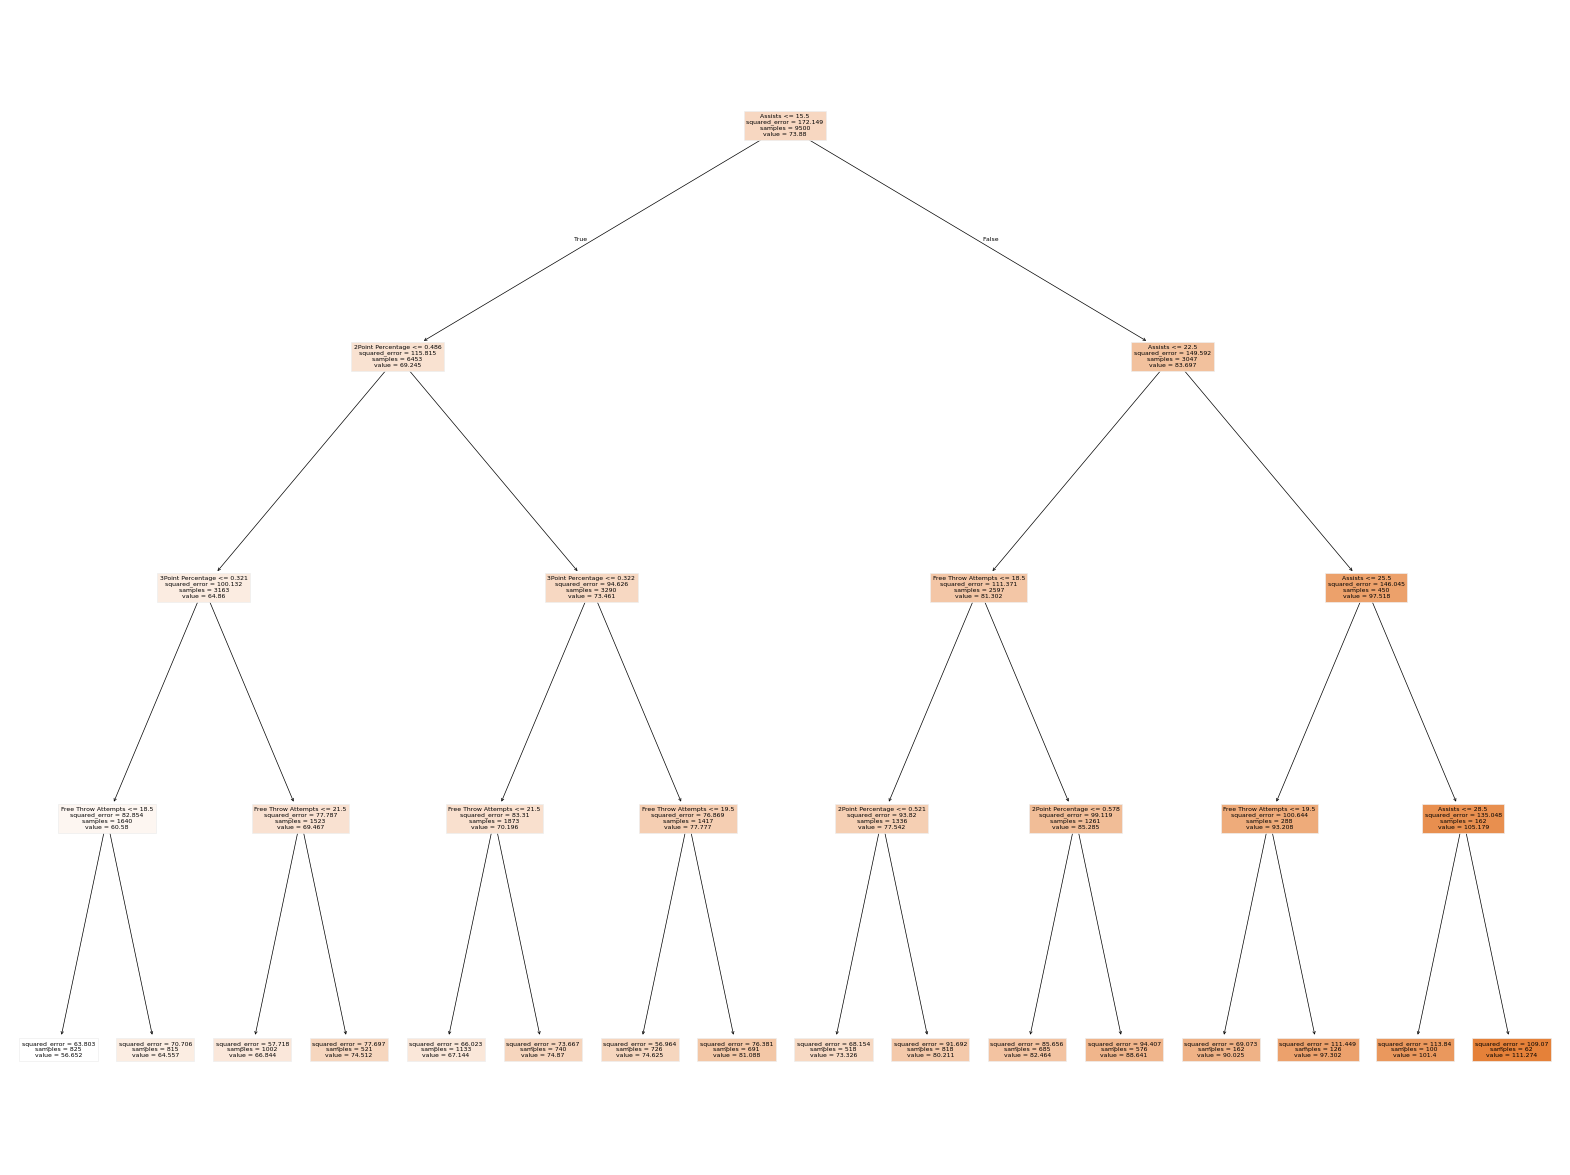

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz
# Visualizing the decision tree
plt.figure(figsize=(20,15))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns)
plt.show()

set max depth to 4 because otherwise was illegible

# **Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
# Splitting the dataset into training and testing sets
X = df_sig_variables_not_opponents
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the decision tree classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:

# Predicting test set results
y_pred = classifier.predict(X_test)

In [ ]:

# Evaluating the classifier
# print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7373737373737373


In [ ]:
# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 4), 'criterion': ['gini']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_depth': array([3])})

In [ ]:
# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')


Best parameters: {'criterion': 'gini', 'max_depth': np.int64(3)}
Best score: 0.7243157894736841


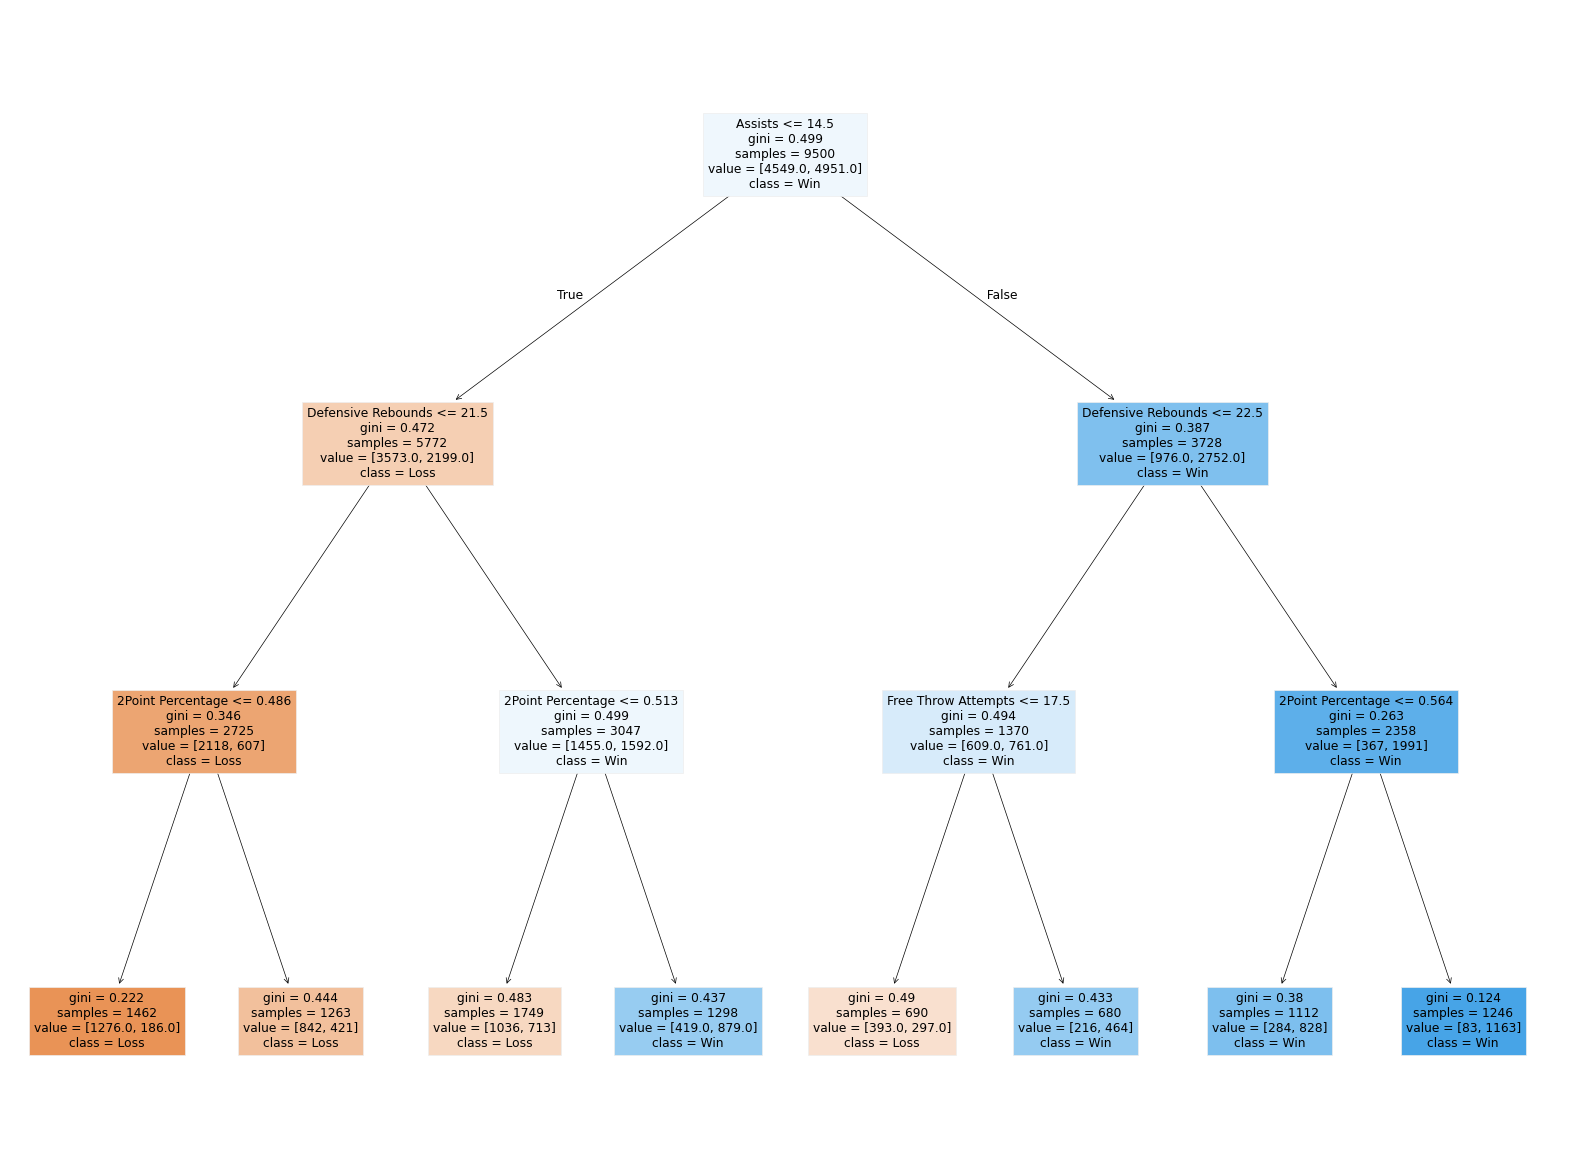

In [ ]:
# Visualizing the decision tree
plt.figure(figsize=(20,15))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns, class_names=['Loss', 'Win'])
plt.show()

same for this one!

# **Clustering**

Clustering per Team


PCA Loadings:
                        PC1 Loading  PC2 Loading
3Point Percentage         -0.261649    -0.012959
2Point Percentage         -0.320650     0.148939
Free Throw Attempts        0.155531     0.393487
Offensive Rebounds         0.078738     0.323129
Defensive Rebounds        -0.287242     0.208004
Assists                   -0.279808     0.130659
Blocks                    -0.083411     0.303798
Turnovers                  0.241361     0.137975
Personal Fouls             0.310946     0.264590
OP 3Point Percentage       0.154393    -0.197519
OP 2Point Percentage       0.265082    -0.278104
OP Free Throw Attempts     0.331365     0.217220
OP Offensive Rebounds      0.173626     0.024214
OP Defensive Rebounds      0.196964    -0.278657
OP Assists                 0.255501    -0.212877
OP Blocks                  0.278467     0.044461
OP Turnovers               0.207894     0.182189
OP Personal Fouls          0.129378     0.393021


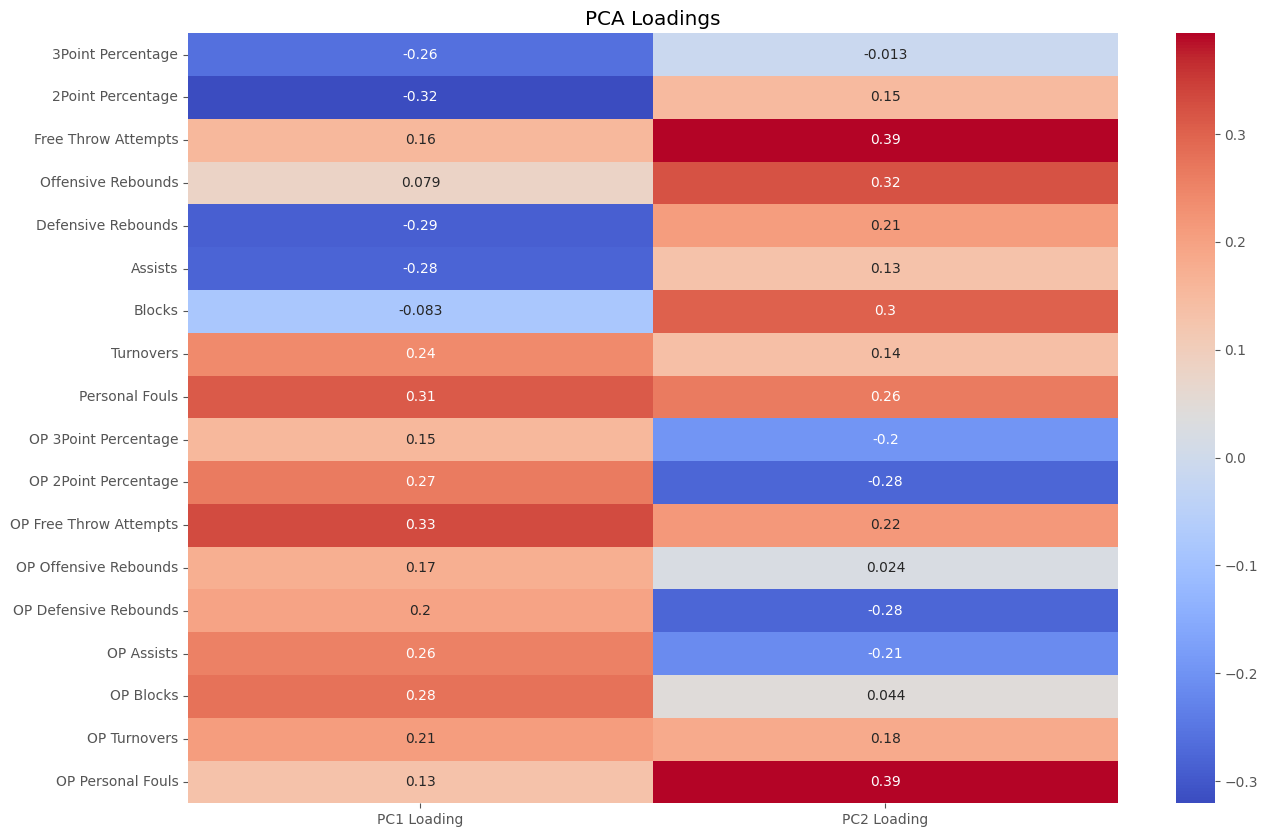


Team PC Scores:
                        PC1       PC2
Team                                 
Abilene Christian  4.376462  2.738079
Air Force          1.075678 -1.851809
Akron             -2.170932  1.396156
Alabama           -0.509617  4.910684
Alabama A&M        5.391735  2.788240
...                     ...       ...
Wright State      -1.546829 -0.975882
Wyoming            0.667608 -0.033844
Xavier            -1.292823 -0.720745
Yale              -2.847870  0.711731
Youngstown State   0.299598  2.360987

[364 rows x 2 columns]


In [ ]:
# Expanded feature list: team stats + opponent stats
pca_features = [
    '3Point Percentage', '2Point Percentage', 'Free Throw Attempts',
    'Offensive Rebounds', 'Defensive Rebounds',
    'Assists', 'Blocks', 'Turnovers', 'Personal Fouls',
    'OP 3Point Percentage', 'OP 2Point Percentage', 'OP Free Throw Attempts',
    'OP Offensive Rebounds', 'OP Defensive Rebounds',
    'OP Assists', 'OP Blocks', 'OP Turnovers', 'OP Personal Fouls'
]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get data set to be team-level
team_avg_stats = df2.groupby('Team')[pca_features].mean()

# Pull only specific variables for PCAs
team_features = team_avg_stats[pca_features]

# Scale data
scaler_new = StandardScaler()
team_features_scaled = scaler_new.fit_transform(team_features)

# Fit PCA model based off team data
pca_new = PCA(n_components=2)
team_pc_scores = pca_new.fit_transform(team_features_scaled)

pca_new_loadings_df = pd.DataFrame(pca_new.components_.T,
                           index=pca_features,
                           columns=['PC1 Loading', 'PC2 Loading'])
print("\nPCA Loadings:")
print(pca_new_loadings_df)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pca_new_loadings_df, cmap="coolwarm", annot=True)
plt.title('PCA Loadings')
plt.show()

# Create a DataFrame with team PC scores
team_pc_df = pd.DataFrame(team_pc_scores, columns=['PC1', 'PC2'], index=team_features.index)

# Output
print("\nTeam PC Scores:")
print(team_pc_df)

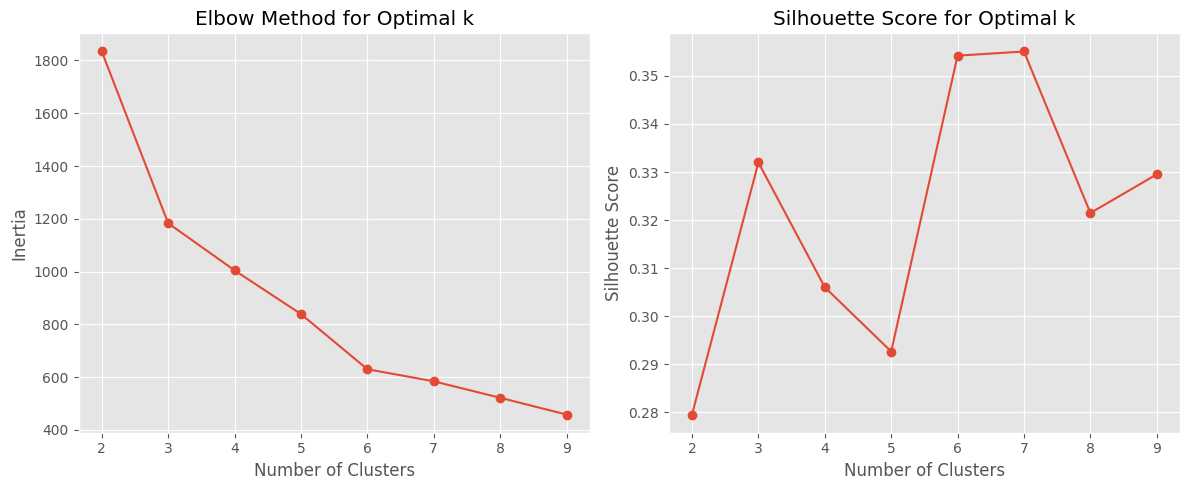

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Determine optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, min(10, len(team_pc_df) + 1))  # Can't have more clusters than teams

for k in k_range:
    if len(team_pc_df) >= k:  # Ensure we have enough data points
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(team_pc_scores)
        inertia.append(kmeans.inertia_)
        if k > 1:  # Silhouette score requires at least 2 clusters
            silhouette_scores.append(silhouette_score(team_pc_scores, kmeans.labels_))

# Plot elbow method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(list(k_range), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(list(k_range)[0:], silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


Team Clusters:
                        PC1       PC2  Cluster
Team                                          
Abilene Christian  4.376462  2.738079        2
Air Force          1.075678 -1.851809        2
Akron             -2.170932  1.396156        0
Alabama           -0.509617  4.910684        0
Alabama A&M        5.391735  2.788240        2
...                     ...       ...      ...
Wright State      -1.546829 -0.975882        1
Wyoming            0.667608 -0.033844        2
Xavier            -1.292823 -0.720745        1
Yale              -2.847870  0.711731        1
Youngstown State   0.299598  2.360987        0

[364 rows x 3 columns]


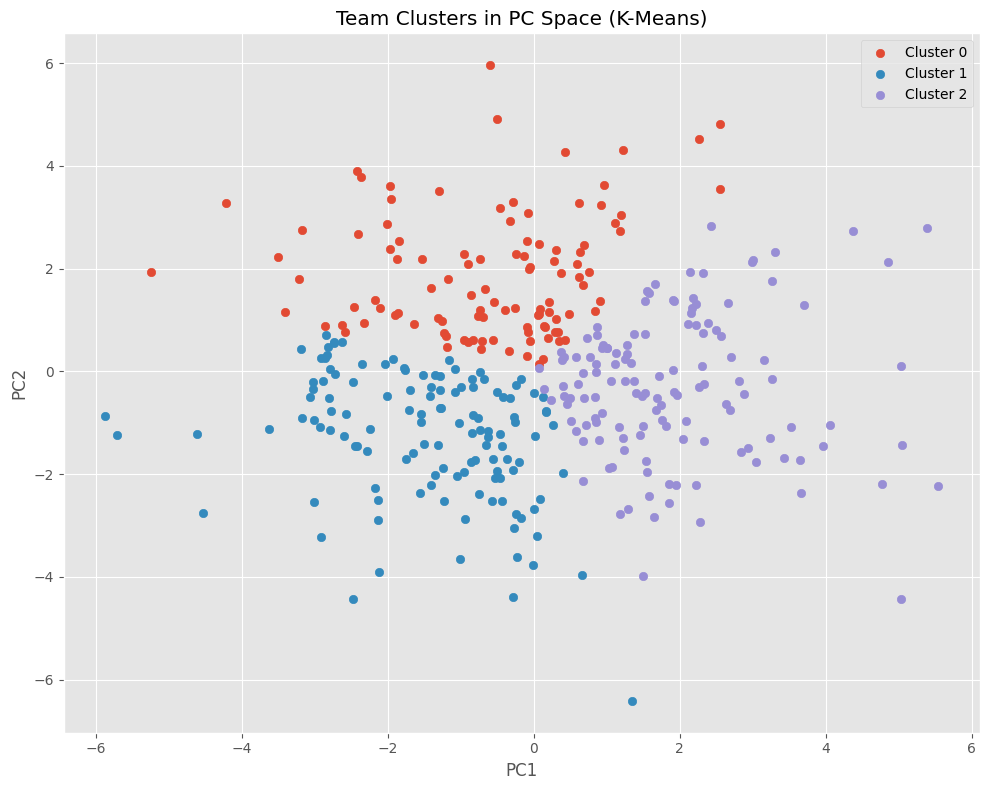

In [ ]:
optimal_k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
team_clusters = kmeans.fit_predict(team_pc_scores)

# Add cluster labels to team data
team_pc_df['Cluster'] = team_clusters
print("\nTeam Clusters:")
print(team_pc_df)

# Visualize clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_teams = team_pc_df[team_pc_df['Cluster'] == cluster]
    plt.scatter(
        cluster_teams['PC1'],
        cluster_teams['PC2'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Team Clusters in PC Space (K-Means)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze cluster characteristics
cluster_means = team_pc_df.groupby('Cluster').mean()
print("\nCluster Average PC Scores:")
print(cluster_means)

# Get raw statistical profiles by cluster
team_stats_with_cluster = team_avg_stats.copy()
team_stats_with_cluster['Cluster'] = team_clusters
cluster_raw_stats = team_stats_with_cluster.groupby('Cluster').mean()
print("\nCluster Average Raw Statistics:")
print(cluster_raw_stats)

# Calculate win percentage by team and analyze by cluster
team_win_pct = df2.groupby('Team')['Result'].mean()
team_pc_df['Win_Pct'] = team_win_pct
cluster_win_pct = team_pc_df.groupby('Cluster')['Win_Pct'].mean()
print("\nAverage Win Percentage by Cluster:")
print(cluster_win_pct)


Cluster Average PC Scores:
              PC1       PC2
Cluster                    
0       -0.626394  1.878699
1       -1.478309 -1.261595
2        1.914126 -0.304402

Cluster Average Raw Statistics:
         3Point Percentage  2Point Percentage  Free Throw Attempts  \
Cluster                                                              
0                 0.339902           0.534057            20.912479   
1                 0.349931           0.527851            17.226987   
2                 0.325682           0.493731            19.653954   

         Offensive Rebounds  Defensive Rebounds    Assists    Blocks  \
Cluster                                                                
0                  9.801972           23.913640  14.469758  3.987952   
1                  8.019170           23.342351  14.167813  3.073881   
2                  9.060421           22.122986  12.534870  3.121350   

         Turnovers  Personal Fouls  OP 3Point Percentage  \
Cluster                    

# **Hierarchical Classifier**

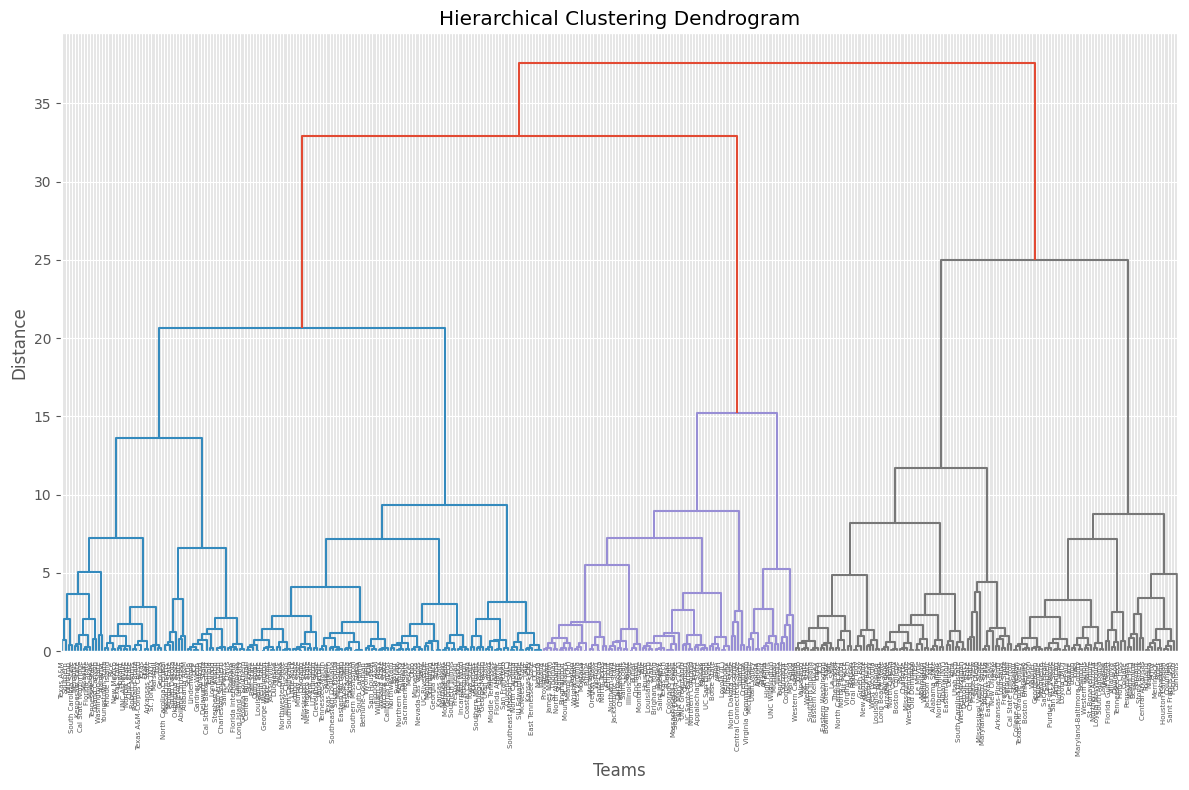

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
linkage_matrix = linkage(team_pc_scores, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=team_avg_stats.index,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Teams')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

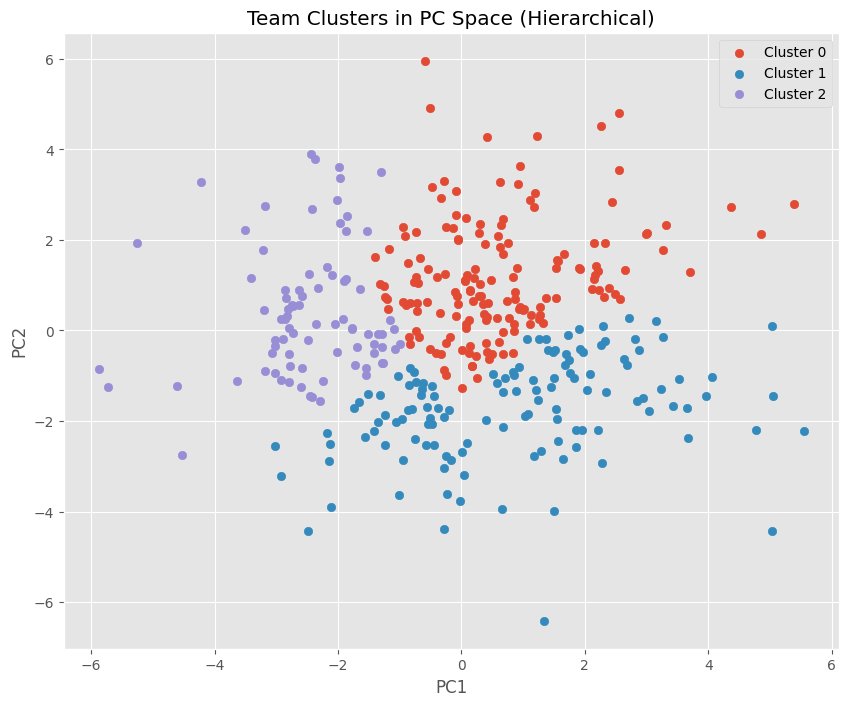


Average Win Percentage by Cluster:
Cluster
0    0.537703
1    0.383745
2    0.675501
Name: Win_Pct, dtype: float64


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

plt.figure(figsize=(10, 8))

# Visualize clustering result
clusters_3 = cut_tree(linkage_matrix, n_clusters=3).flatten()
team_pc_df['Cluster'] = clusters_3

# Loop through each cluster and plot separately
for cluster_id in np.unique(clusters_3):
    cluster_points = team_pc_df[clusters_3 == cluster_id]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'],
                label=f'Cluster {cluster_id}', cmap='tab10')

plt.title('Team Clusters in PC Space (Hierarchical)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


team_win_pct = df2.groupby('Team')['Result'].mean()
team_pc_df['Win_Pct'] = team_win_pct
cluster_win_pct = team_pc_df.groupby('Cluster')['Win_Pct'].mean()
print("\nAverage Win Percentage by Cluster:")
print(cluster_win_pct)

